In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mtalbert_soil = pd.read_csv("../EcologyDistrict/AcrossStationData/MtAlbert_Data_Hourly.csv", index_col='Timestamp (UTC+12:00)', parse_dates=True)
mtalbert_soil.head()

,Rain(mm),SoilTemp(c),SoilMoisture(%)
Timestamp (UTC+12:00),,,
2019-05-26 06:00:00,0.0,14.4000,41.620375
2019-05-26 07:00:00,0.0,14.3625,41.610875
2019-05-26 08:00:00,0.0,14.3000,41.591000
2019-05-26 09:00:00,0.0,14.3625,41.594750
2019-05-26 10:00:00,0.0,14.4000,41.582875


In [3]:
mtalbert_soil.index.freq = 'H'

C:\Users\Ying\AppData\Local\Temp\ipykernel_10328\3173936285.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  mtalbert_soil.index.freq = 'H'


In [4]:
mtalbert_soil.index.freq

<Hour>

In [5]:
mtalbert_soil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47370 entries, 2019-05-26 06:00:00 to 2024-10-19 23:00:00
Freq: h
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rain(mm)         47370 non-null  float64
 1   SoilTemp(c)      47370 non-null  float64
 2   SoilMoisture(%)  47370 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima


In [8]:
mtalbert_soil.isna().sum()


Rain(mm)           0
SoilTemp(c)        0
SoilMoisture(%)    0
dtype: int64

In [9]:
mtalbert_soil.interpolate(method="linear")

,Rain(mm),SoilTemp(c),SoilMoisture(%)
Timestamp (UTC+12:00),,,
2019-05-26 06:00:00,0.0,14.4000,41.620375
2019-05-26 07:00:00,0.0,14.3625,41.610875
2019-05-26 08:00:00,0.0,14.3000,41.591000
2019-05-26 09:00:00,0.0,14.3625,41.594750
2019-05-26 10:00:00,0.0,14.4000,41.582875
...,...,...,...
2024-10-19 19:00:00,0.0,16.8125,47.186875
2024-10-19 20:00:00,0.0,16.7250,47.184875
2024-10-19 21:00:00,0.0,16.5875,47.238875


<Axes: xlabel='Timestamp (UTC+12:00)'>

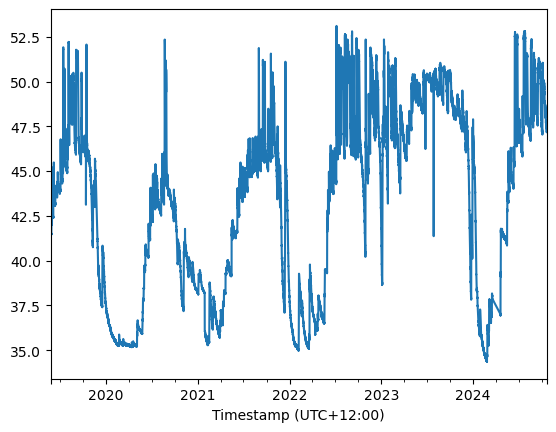

In [10]:
mtalbert_soil['SoilMoisture(%)'].plot()

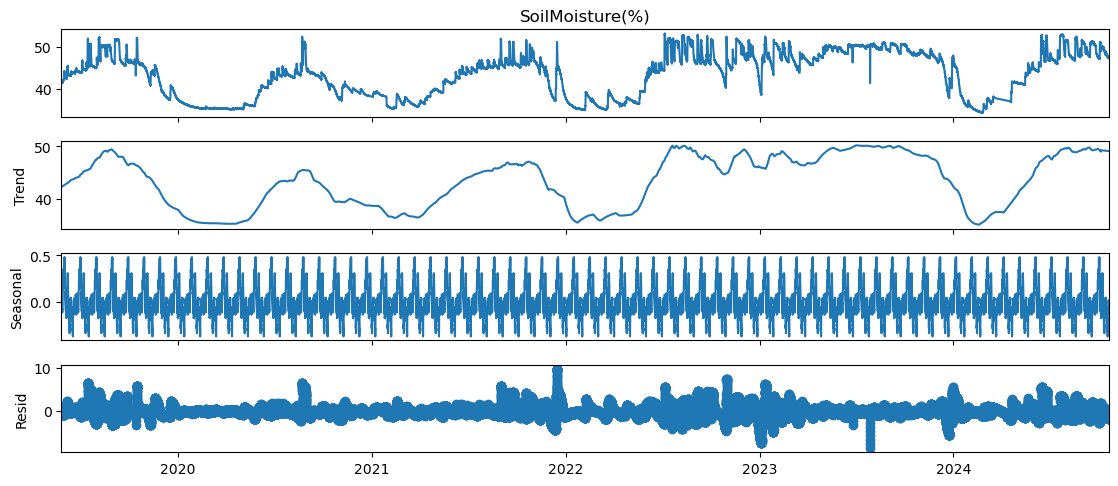

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
mtalbert_soil_seasonal_component = seasonal_decompose(mtalbert_soil['SoilMoisture(%)'], model='additive', period=720, extrapolate_trend='freq') 
fig = mtalbert_soil_seasonal_component.plot()
fig.set_size_inches((12, 5))
plt.show()

In [12]:
auto_arima(mtalbert_soil['SoilMoisture(%)'], seasonal=True, m=12)

In [ ]:
features = len(mtalbert_soil) * 0.8

In [ ]:
train = mtalbert_soil.iloc[:features]
test = mtalbert_soil.iloc[features:]

In [ ]:
model = SARIMAX(train['SoilMoisture(%)'], order=(0,1,1), seasonal_order=(1,0,1,12))

In [ ]:
results = model.fit()
results.summary()

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
predictions= results.predict(start, end, type='levels').rename('SARIMA Predictions')

In [ ]:
test['SoilMoisture(%)'].plot(legent=True, figsize=(12,8))
predictions.plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['SoilMoisture(%)'], predictions)
error

# Forecast

In [ ]:
model = SARIMAX(train['SoilMoisture(%)'], order=(0,1,1), seasonal_order=(1,0,1,12))
results = model.fit()


In [ ]:
forecast = results.predict(len(mtalbert_soil), len(mtalbert_soil)+672, type='level').rename('SARIMA FORECAST')

In [ ]:
mtalbert_soil['SoilMoisture(%)'].plot(lengend=True, figsize=(12,8))
forecast.plot(leneng=True)